In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
import pickle

In [3]:
# load Dataset
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
## row number , customer id , surname are not required for prediction so we will drop these columns
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head

<bound method NDFrame.head of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  

In [6]:
from sklearn.compose import ColumnTransformer

encoder =  OneHotEncoder(sparse_output=False, drop='first')
scaler = StandardScaler()

target = "Exited"

cat_features = [col for col in data.columns if data[col].dtype == 'object' and col != target]
num_features = [col for col in data.columns if data[col].dtype != 'object' and col != target]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_features),
        ('cat', encoder, cat_features)
    ]
)

In [7]:
## dividing the data into features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [8]:
## Saving the preprocessor object to a file using pickle
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

## ANN MODEL 


In [9]:
!!pip install tensorflow

['Requirement already satisfied: tensorflow in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (2.20.0)',
 'Requirement already satisfied: absl-py>=1.0.0 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from tensorflow) (2.3.1)',
 'Requirement already satisfied: astunparse>=1.6.0 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from tensorflow) (1.6.3)',
 'Requirement already satisfied: flatbuffers>=24.3.25 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from tensorflow) (25.2.10)',
 'Requirement already satisfied: gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from tensorflow) (0.6.0)',
 'Requirement already satisfied: google_pasta>=0.1.1 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from tensorflow) (0.2.0)',
 'Requirement alre

In [10]:
!!pip install keras

['Requirement already satisfied: keras in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (3.11.3)',
 'Requirement already satisfied: absl-py in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from keras) (2.3.1)',
 'Requirement already satisfied: numpy in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from keras) (2.3.2)',
 'Requirement already satisfied: rich in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from keras) (14.1.0)',
 'Requirement already satisfied: namex in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from keras) (0.1.0)',
 'Requirement already satisfied: h5py in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from keras) (3.14.0)',
 'Requirement already satisfied: optree in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (fr

In [11]:
(X_test_transformed.shape[1],)

(11,)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_transformed.shape[1],)),       # Input shape -- First Hidden Layer --> (11,)
    Dense(32, activation='relu'),        # -- Second Hidden Layer 
    Dense(1, activation='sigmoid')          # Output Layer
])

In [13]:
model.get_weights()

[array([[ 0.27885446, -0.0572976 ,  0.09475839, -0.01218611, -0.23389392,
         -0.19745657,  0.02509335,  0.10296738,  0.2613754 ,  0.2060718 ,
          0.2790374 ,  0.07452837,  0.18454257, -0.12436011, -0.02255464,
         -0.25674492, -0.15815994,  0.15395457,  0.06371835,  0.0082477 ,
         -0.09420711,  0.2534397 ,  0.17913374,  0.03187665,  0.11307278,
          0.03383213, -0.17059514, -0.02651638,  0.09484106,  0.16411397,
         -0.19157907, -0.09068552,  0.12400115,  0.19508672, -0.02182797,
         -0.12749442, -0.21778795, -0.15790212,  0.07885501, -0.02137905,
         -0.26516223,  0.07244322,  0.00153974,  0.02300692,  0.06353661,
          0.22154924, -0.05609848,  0.26093927, -0.04070941,  0.23718682,
          0.17491457,  0.00756654,  0.02697244, -0.25206298, -0.2349641 ,
         -0.2754098 , -0.03616874, -0.2750726 ,  0.05805847, -0.01249051,
          0.14753312, -0.09073064,  0.18386582, -0.00997365],
        [-0.08398944,  0.02849922, -0.14465319,  0

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
## optimizer = 'adam' , 'rmsprop' , 'sgd'
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError

## compile the model
model.compile(optimizer= Adam(learning_rate = 0.001), loss = BinaryCrossentropy(), metrics = ['accuracy'])

In [16]:
## setup tensorboard
import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

## Set up TensorBoard callback to log training metrics
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq = 1)              ## Some histogram diagrams will be created


In [17]:
## Setup EarlyStopping callback to prevent overfitting
## We monitor our loss value on the validation dataset
## If the validation loss does not improve for 5 consecutive epochs, training will stop early
## The best weights observed during training will be restored

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)



In [18]:
## model training
history = model.fit(
    X_train_transformed, y_train,
    validation_split = 0.2,
    epochs = 100,
    callbacks = [tensorboard_callback,early_stopping_callback]  ## we can use any one of these callbacks or both
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8056 - loss: 0.4558 - val_accuracy: 0.8344 - val_loss: 0.4042
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8378 - loss: 0.3962 - val_accuracy: 0.8456 - val_loss: 0.3773
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.3636 - val_accuracy: 0.8475 - val_loss: 0.3574
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8564 - loss: 0.3507 - val_accuracy: 0.8512 - val_loss: 0.3498
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.3439 - val_accuracy: 0.8544 - val_loss: 0.3463
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.3394 - val_accuracy: 0.8500 - val_loss: 0.3507
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.3375 - val_accuracy: 0.8550 - val_loss: 0.3425
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.3364 - val_accu

In [19]:
# Load Tensorboard Extension in VS Code and run the following command in terminal to visualize the training metrics
%load_ext tensorboard



In [20]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 10700), started 1:21:29 ago. (Use '!kill 10700' to kill it.)

In [21]:
model.evaluate(X_test_transformed, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8540 - loss: 0.3423


[0.34225985407829285, 0.8539999723434448]

In [22]:
## save the model
model.save('churn_model.h5')

In [23]:
!!pip install matplotlib

['Requirement already satisfied: matplotlib in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (3.10.5)',
 'Requirement already satisfied: contourpy>=1.0.1 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from matplotlib) (1.3.3)',
 'Requirement already satisfied: cycler>=0.10 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from matplotlib) (0.12.1)',
 'Requirement already satisfied: fonttools>=4.22.0 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from matplotlib) (4.59.1)',
 'Requirement already satisfied: kiwisolver>=1.3.1 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from matplotlib) (1.4.9)',
 'Requirement already satisfied: numpy>=1.23 in c:\\users\\rushi\\appdata\\local\\programs\\python\\python313\\lib\\site-packages (from matplotlib) (2.3.2)',
 'Requirement already satisfied: packaging>=20.0 i

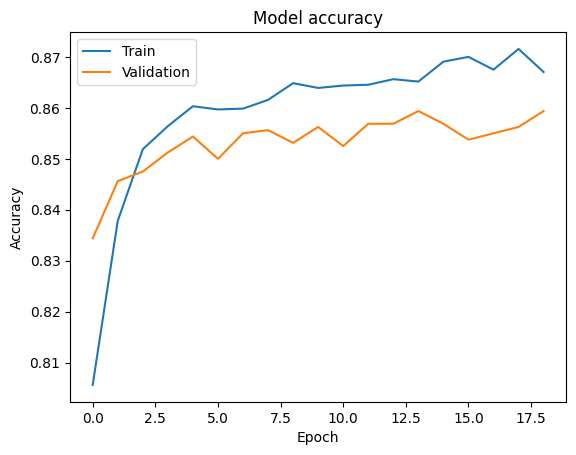

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


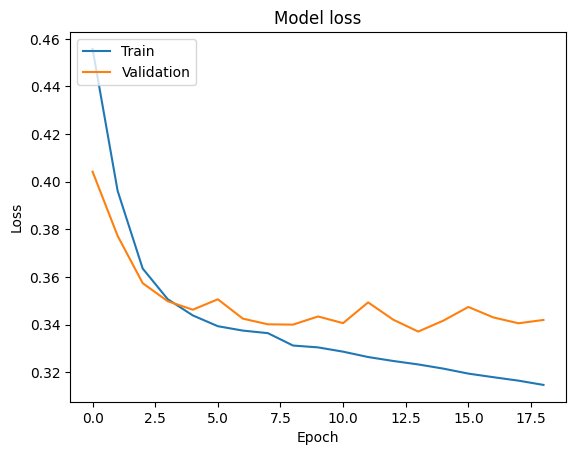

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [27]:
model.save('Churn_model.keras')